In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
files=os.listdir('.')

In [ ]:
files.remove('.ipynb_checkpoints')
files.remove('.config')
files.remove('sample_data')
files

['20220208.csv',
 '20221225.csv',
 '20220202.csv',
 '20220221.csv',
 '20220204.csv',
 '20211204.csv',
 '20220206.csv',
 '20220502.csv',
 '20230416.csv']

In [ ]:
data_file = files[8]

In [ ]:
data = pd.read_csv(data_file)

In [ ]:
data = data.rename(columns={'UTCDateTime': "datetime"})

In [ ]:
data['datetime']=pd.to_datetime(data['datetime'])

In [ ]:
data['datetime']

0     2023-04-16 00:01:54+00:00
1     2023-04-16 00:03:48+00:00
2     2023-04-16 00:05:48+00:00
3     2023-04-16 00:07:57+00:00
4     2023-04-16 00:09:57+00:00
                 ...           
709   2023-04-16 23:51:14+00:00
710   2023-04-16 23:53:14+00:00
711   2023-04-16 23:55:14+00:00
712   2023-04-16 23:57:14+00:00
713   2023-04-16 23:59:25+00:00
Name: datetime, Length: 714, dtype: datetime64[ns, UTC]

In [ ]:
data['datetime'].min()

Timestamp('2023-04-16 00:01:54+0000', tz='UTC')

In [ ]:
air_quality = data.copy()

In [ ]:
data.columns

Index(['datetime', 'mac_address', 'firmware_ver', 'hardware', 'current_temp_f',
       'current_humidity', 'current_dewpoint_f', 'pressure', 'adc', 'mem',
       'rssi', 'uptime', 'pm1_0_cf_1', 'pm2_5_cf_1', 'pm10_0_cf_1',
       'pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm', 'pm2.5_aqi_cf_1',
       'pm2.5_aqi_atm', 'p_0_3_um', 'p_0_5_um', 'p_1_0_um', 'p_2_5_um',
       'p_5_0_um', 'p_10_0_um', 'pm1_0_cf_1_b', 'pm2_5_cf_1_b',
       'pm10_0_cf_1_b', 'pm1_0_atm_b', 'pm2_5_atm_b', 'pm10_0_atm_b',
       'pm2.5_aqi_cf_1_b', 'pm2.5_aqi_atm_b', 'p_0_3_um_b', 'p_0_5_um_b',
       'p_1_0_um_b', 'p_2_5_um_b', 'p_5_0_um_b', 'p_10_0_um_b', 'gas'],
      dtype='object')

In [ ]:
data = data.rename(columns={'current_temp_f': "temp(F)",
                            'current_humidity': "humidity",
                            'pm2.5_aqi_atm': "AQI",
                            'pm1_0_atm':"PM1",
                            'pm2_5_atm':"PM2.5",
                            'pm10_0_atm':"PM10"})

In [ ]:
air_quality=data[['datetime','temp(F)','humidity','AQI','PM1','PM2.5','PM10']]

air_quality=air_quality.groupby(air_quality["datetime"].dt.hour).mean()
air_quality = air_quality.rename(columns={"datetime":"hour"})
air_quality.index.names = ['hour']
air_quality

<ipython-input-766-966e3badb8db>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  air_quality=air_quality.groupby(air_quality["datetime"].dt.hour).mean()


,temp(F),humidity,AQI,PM1,PM2.5,PM10
hour,,,,,,
0,72.344828,44.586207,72.275862,16.740000,22.213793,23.865862
1,71.966667,44.900000,75.066667,17.498667,23.523000,25.146667
2,71.866667,44.066667,69.500000,15.591333,20.874667,22.173333
3,69.066667,45.600000,64.433333,13.720000,18.487667,19.623333
4,67.965517,47.068966,67.413793,14.683793,19.975172,21.289310
5,69.600000,45.900000,58.566667,11.729000,15.818000,17.066000
6,68.100000,49.333333,44.100000,8.050333,10.598667,11.179333
7,67.100000,55.500000,35.866667,6.314333,8.618333,9.291667
8,66.700000,58.066667,42.566667,7.146667,10.228333,11.124000


In [ ]:
var='PM10'

In [ ]:
air_quality.to_csv('clean_'+data_file)

In [ ]:
air_quality

,temp(F),humidity,AQI,PM1,PM2.5,PM10
hour,,,,,,
0,72.344828,44.586207,72.275862,16.740000,22.213793,23.865862
1,71.966667,44.900000,75.066667,17.498667,23.523000,25.146667
2,71.866667,44.066667,69.500000,15.591333,20.874667,22.173333
3,69.066667,45.600000,64.433333,13.720000,18.487667,19.623333
4,67.965517,47.068966,67.413793,14.683793,19.975172,21.289310
5,69.600000,45.900000,58.566667,11.729000,15.818000,17.066000
6,68.100000,49.333333,44.100000,8.050333,10.598667,11.179333
7,67.100000,55.500000,35.866667,6.314333,8.618333,9.291667
8,66.700000,58.066667,42.566667,7.146667,10.228333,11.124000


In [ ]:
air_quality=data[['datetime','temp(F)','humidity','AQI','PM1','PM2.5','PM10']]


In [ ]:
air_quality

,datetime,temp(F),humidity,AQI,PM1,PM2.5,PM10
0,2023-04-16 00:01:54+00:00,75,43,70,16.69,21.34,22.63
1,2023-04-16 00:03:48+00:00,74,43,71,16.48,21.60,24.40
2,2023-04-16 00:05:48+00:00,74,43,72,16.68,22.32,24.45
3,2023-04-16 00:07:57+00:00,74,43,70,16.09,21.14,24.49
4,2023-04-16 00:09:57+00:00,74,43,69,15.81,20.81,22.11
...,...,...,...,...,...,...,...
709,2023-04-16 23:51:14+00:00,42,70,0,0.00,0.09,0.09
710,2023-04-16 23:53:14+00:00,42,70,0,0.00,0.00,0.17
711,2023-04-16 23:55:14+00:00,42,70,0,0.00,0.07,0.07
712,2023-04-16 23:57:14+00:00,42,70,1,0.00,0.16,0.16


<Axes: xlabel='datetime'>

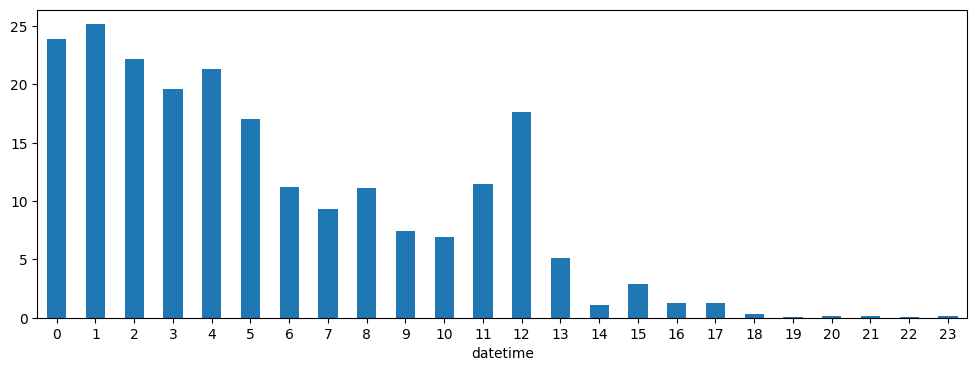

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["PM10"].mean().plot(
    kind='bar', rot=0, ax=axs
)

<Axes: xlabel='datetime'>

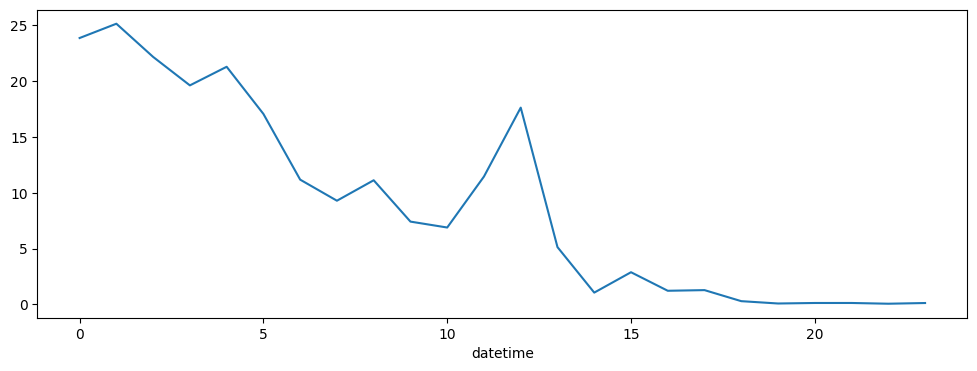

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["PM10"].mean().plot(
    kind='line', rot=0, ax=axs
)

In [ ]:
air_quality=air_quality.groupby(air_quality["datetime"].dt.hour).mean()


<ipython-input-774-a0d6d141ef2b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  air_quality=air_quality.groupby(air_quality["datetime"].dt.hour).mean()
